In [209]:
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import pandas as pd

In [220]:
cocacola_weekly= get_data("ko", start_date="01/01/2000", end_date="17/08/2023", index_as_date = True, interval="1wk")

In [221]:
cocacola_weekly

,open,high,low,close,adjclose,volume,ticker
2000-01-01,29.000000,30.37500,27.625000,30.375000,15.928946,46365600,KO
2000-01-08,30.375000,30.96875,29.375000,30.531250,16.010885,40130800,KO
2000-01-15,30.531250,33.43750,30.531250,33.437500,17.534937,54089800,KO
2000-01-22,33.375000,33.37500,28.468750,28.468750,14.929288,73174400,KO
2000-01-29,28.468750,29.37500,27.531250,28.125000,14.749020,46979400,KO
...,...,...,...,...,...,...,...
2023-07-15,60.759998,62.68000,60.410000,62.439999,62.439999,58479400,KO
2023-07-22,62.419998,63.27000,61.389999,62.480000,62.480000,62058200,KO
2023-07-29,62.450001,62.59000,60.619999,60.709999,60.709999,53312900,KO
2023-08-05,60.790001,61.73000,60.619999,61.169998,61.169998,39196500,KO


In [170]:
cocacola_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2000-01-01 to 2023-08-12
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1233 non-null   float64
 1   high      1233 non-null   float64
 2   low       1233 non-null   float64
 3   close     1233 non-null   float64
 4   adjclose  1233 non-null   float64
 5   volume    1233 non-null   int64  
 6   ticker    1233 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 77.1+ KB


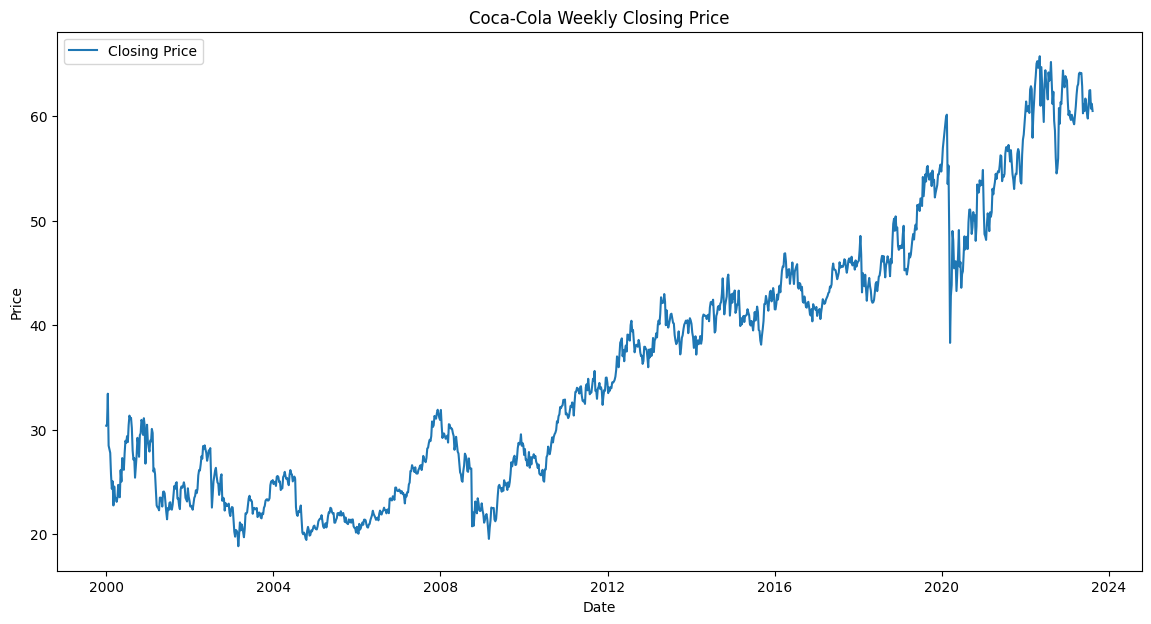

In [171]:
plt.figure(figsize=(14,7))
plt.plot(cocacola_weekly['close'], label='Closing Price')
plt.title('Coca-Cola Weekly Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


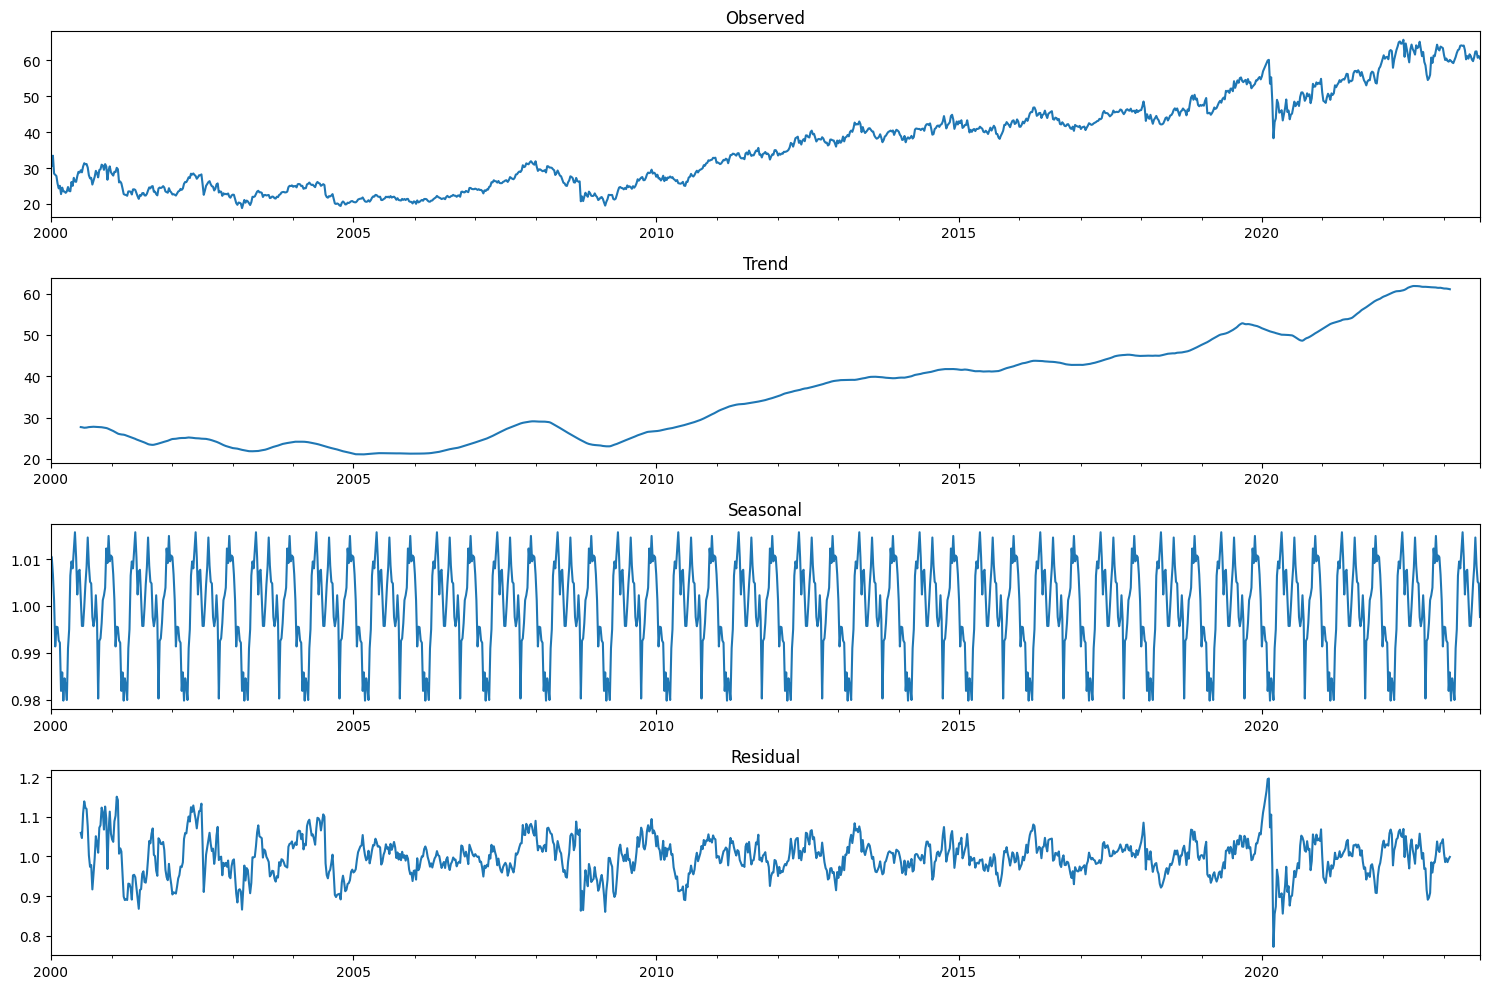

In [173]:
# Assuming df['close'] is your time series data
result = seasonal_decompose(cocacola_weekly['close'], model='multiplicative')

# Create custom-sized subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15, 10))

# Plot the components on the custom axes
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')

plt.tight_layout()
plt.show()


In [174]:
groups = cocacola_weekly['close'].groupby(cocacola_weekly.index.year)

# Initialize an empty DataFrame
variances_df = pd.DataFrame(columns=['year', 'variance'])

for name, group in groups:
    variance = group.values.var()
    variances_df.loc[len(variances_df)] = [name, variance]

print(variances_df)


      year   variance
0   2000.0   6.899405
1   2001.0   4.023416
2   2002.0   4.233075
3   2003.0   2.048405
4   2004.0   5.334740
5   2005.0   0.327167
6   2006.0   1.248526
7   2007.0   6.674540
8   2008.0   8.980757
9   2009.0   7.058266
10  2010.0   4.907159
11  2011.0   1.148518
12  2012.0   2.877701
13  2013.0   2.165076
14  2014.0   3.328111
15  2015.0   1.671544
16  2016.0   2.883138
17  2017.0   3.138822
18  2018.0   4.712730
19  2019.0  11.055911
20  2020.0  22.637816
21  2021.0   7.121000
22  2022.0   6.612643
23  2023.0   2.154206


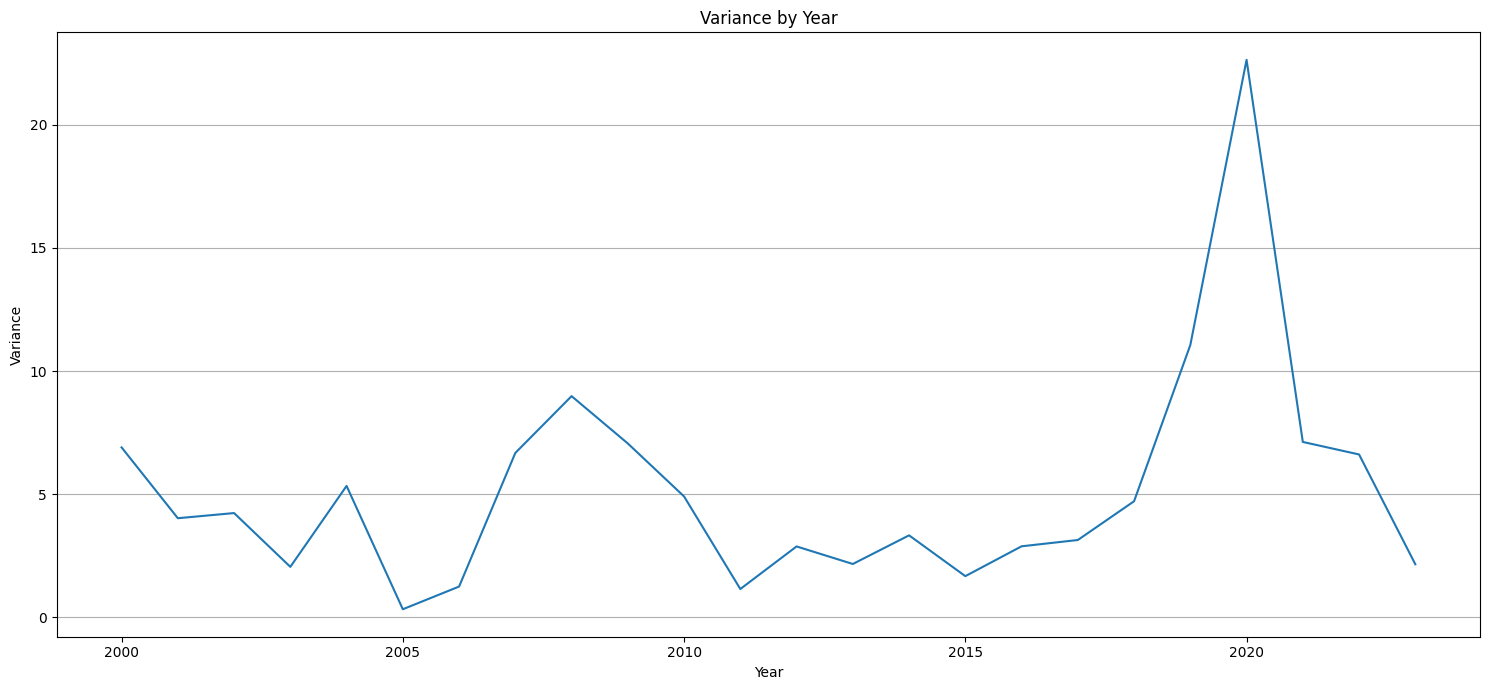

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
variances_df.set_index('year').plot(kind='line', legend=False, ax=plt.gca())
plt.title('Variance by Year')
plt.ylabel('Variance')
plt.xlabel('Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [176]:
result.resid

2000-01-01   NaN
2000-01-08   NaN
2000-01-15   NaN
2000-01-22   NaN
2000-01-29   NaN
              ..
2023-07-15   NaN
2023-07-22   NaN
2023-07-29   NaN
2023-08-05   NaN
2023-08-12   NaN
Name: resid, Length: 1233, dtype: float64

In [177]:
from statsmodels.tsa.stattools import adfuller

# Extract the components 
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Apply ADF test on residuals (after dropping NaN values)
adf_result = adfuller(residual.dropna())

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])


ADF Statistic: -8.441339183601569
p-value: 1.7598502849952202e-13
Critical Values: {'1%': -3.435951457295239, '5%': -2.8640134598745144, '10%': -2.5680869238074364}


In [178]:
result = adfuller(cocacola_weekly['close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.09620872175969451
p-value: 0.9498148526088724


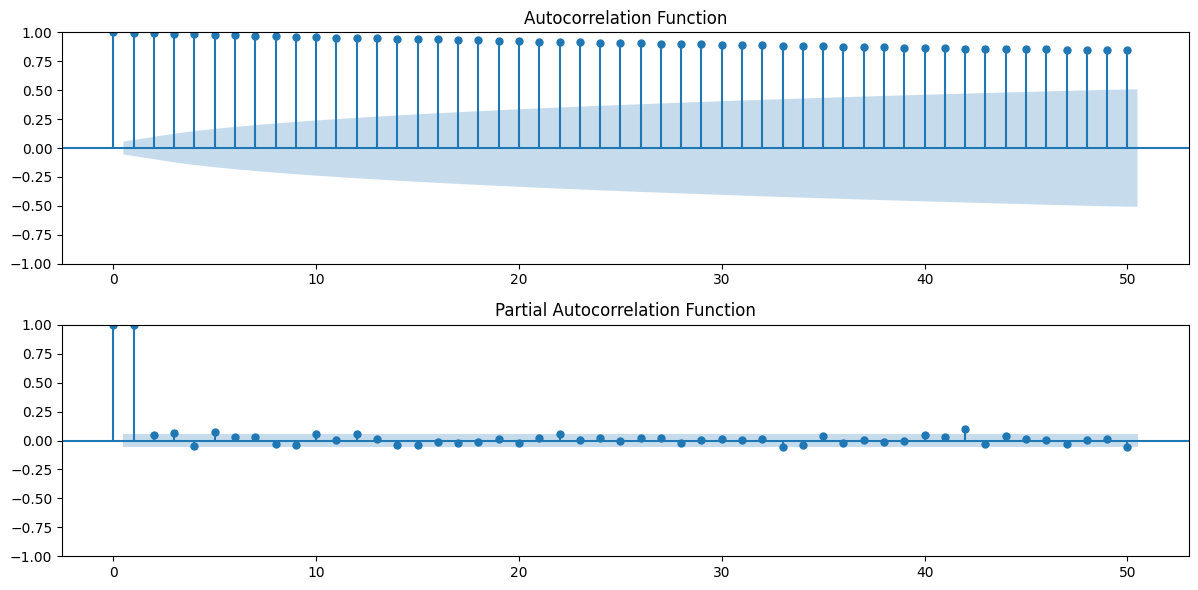

In [179]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you've already loaded your data into a DataFrame named cocacola_weekly
series = cocacola_weekly['close']

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(series, lags=50, ax=plt.gca())  # you can adjust the lags as needed
plt.title('Autocorrelation Function')

plt.subplot(212)
plot_pacf(series, lags=50, ax=plt.gca())  # again, adjust lags as necessary
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [180]:
import pandas as pd
from pmdarima import auto_arima

# Assuming you've already loaded your data into a DataFrame named cocacola_weekly
series = cocacola_weekly['close']

train = series[:-52]
test = series[-52:]

# Apply auto_arima
model = auto_arima(train,
                   seasonal=True,   # Assuming you have seasonal components
                   m=52,            # This is the seasonal period, change if needed
                   trace=True,      # This prints out stats for models being evaluated
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)   # Use the stepwise algorithm for efficiency

# Display model summary
print(model.summary())

# Best hyperparameters can be extracted from the model summary.


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=3412.697, Time=8.67 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3424.525, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=3420.929, Time=2.45 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3419.554, Time=3.03 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=3423.490, Time=0.11 sec
 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=3410.701, Time=11.15 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=3408.705, Time=0.67 sec
 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=3410.701, Time=11.84 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=3408.270, Time=0.57 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=3410.270, Time=8.00 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=3410.270, Time=8.14 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=3412.268, Time=12.97 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=3411.301, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=3406.274, Time=0.41 sec
 ARIMA(1,1,1)(1,

In [181]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,0,0,52))
model_fit = model.fit(disp=False)
predictions = model_fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 4.170987139657423
MAE: 3.5192744103486855


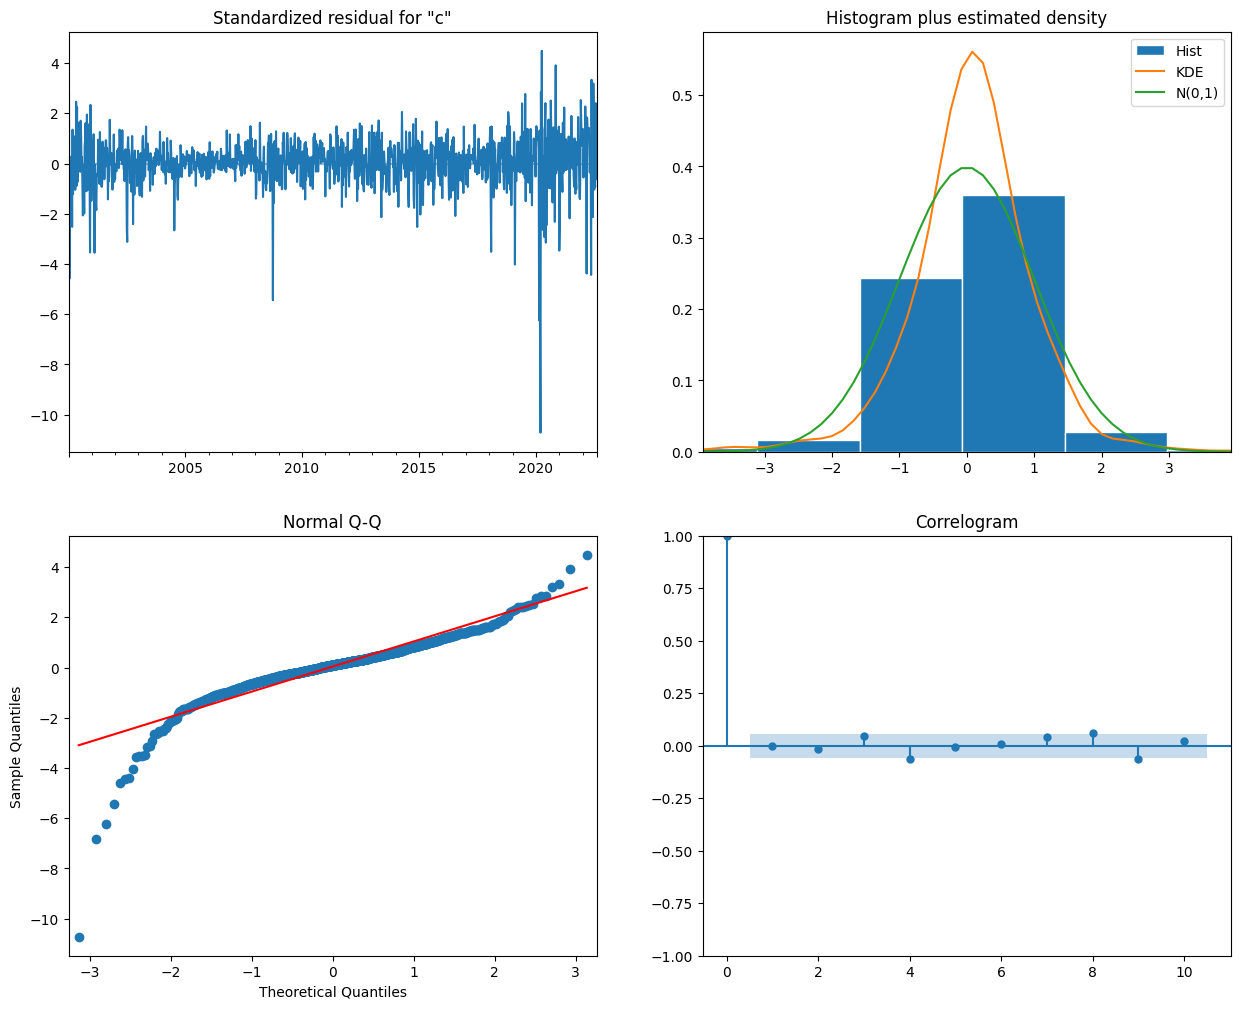

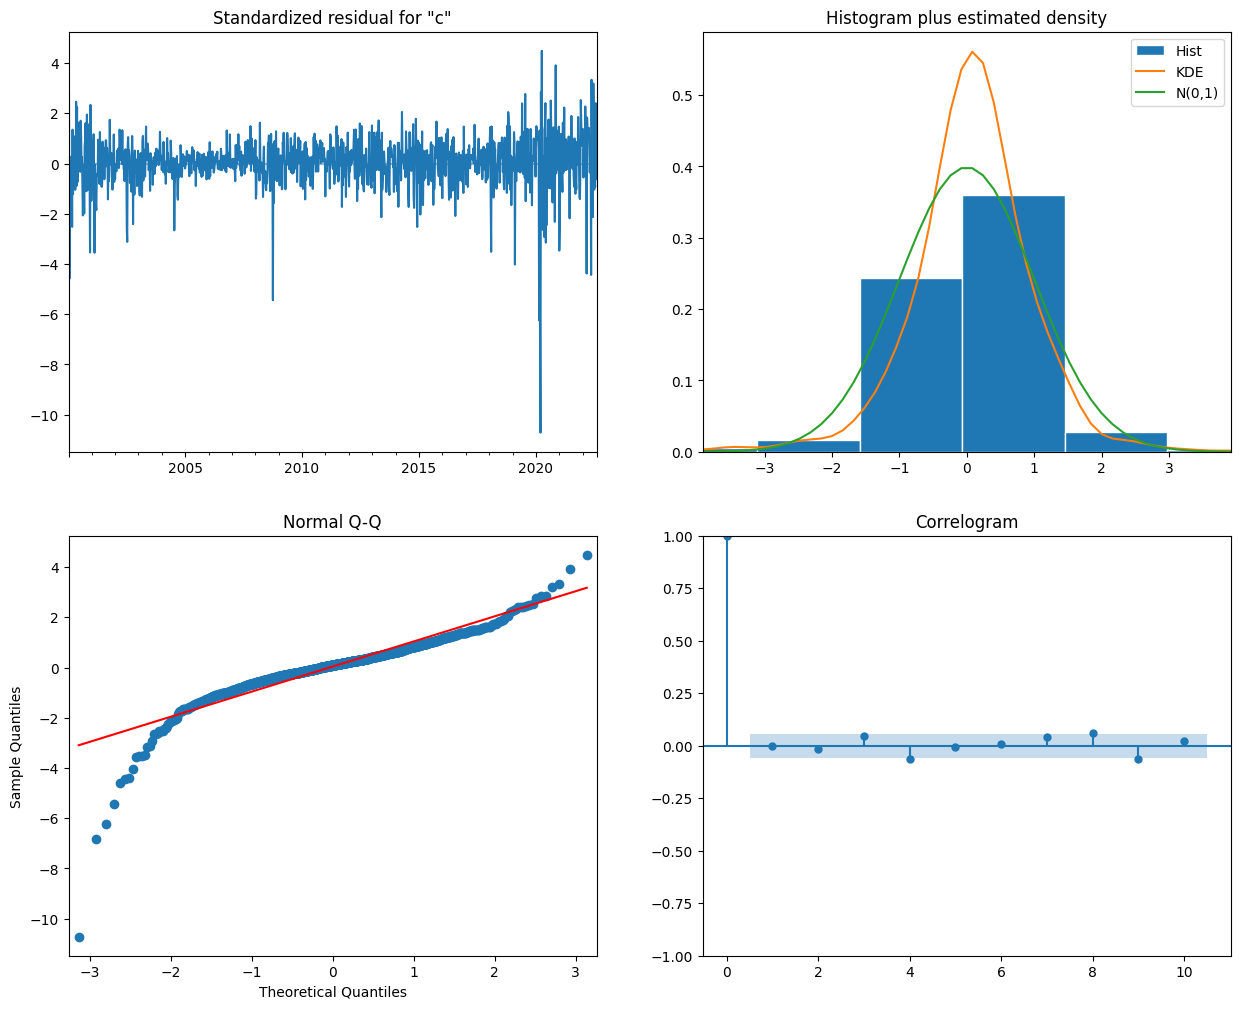

In [182]:
model_fit.plot_diagnostics(figsize=(15,12))

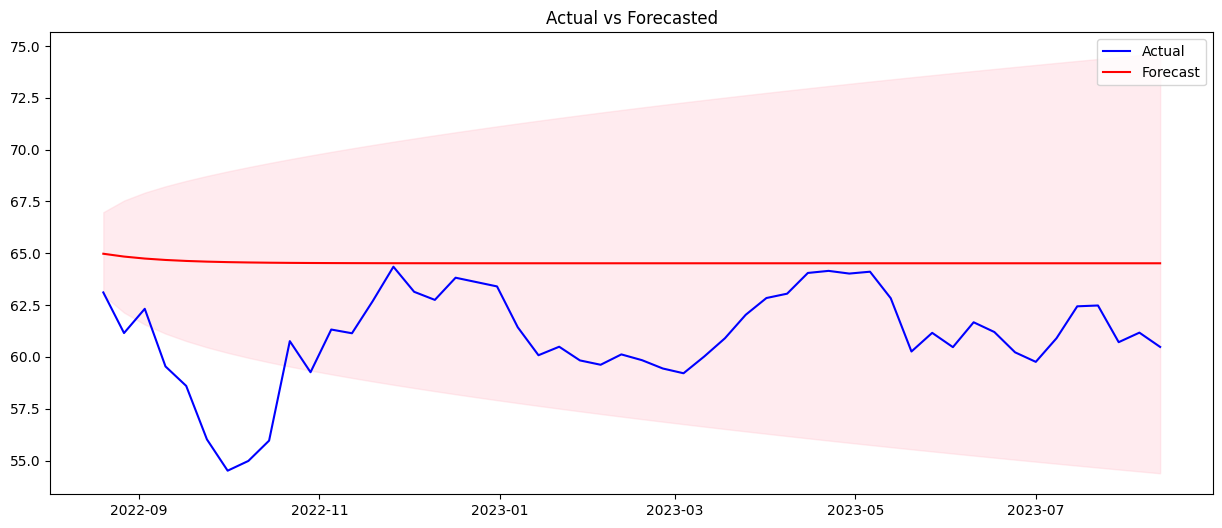

In [183]:
# 2. Generate predictions for the test set
forecast = model_fit.get_forecast(steps=len(test))
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# 3. Plot actual vs. predicted values along with confidence intervals
plt.figure(figsize=(15, 6))
# Actual values
plt.plot(test.index, test, label='Actual', color='blue')
# Predicted values
plt.plot(mean_forecast.index, mean_forecast, label='Forecast', color='red')
# Confidence intervals
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Actual vs Forecasted')
plt.legend()
plt.show()

In [49]:
import pandas as pd
import numpy as np
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


# Assuming you've already loaded your data into a DataFrame named cocacola_weekly
series = cocacola_weekly['close']

# 1. Split the data & Set Up DataFrame
train = series[:-52]
test = series[-52:]
results_df = pd.DataFrame(columns=['p', 'd', 'q', 'P', 'D', 'Q', 'RMSE', 'MAE'])

# 2. Generate combinations for pdq and seasonal PDQ
p = d = q = range(0, 3)  # Adjust if needed
P = D = Q = range(0, 2)  # Adjust if needed
m = 52
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(product(P, D, Q))]

# 3. Model Training, Prediction & Evaluation
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train, order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=0)  # disp=0 turns off debug messages
            predictions = results.forecast(steps=len(test))
            rmse = np.sqrt(mean_squared_error(test, predictions))
            mae = mean_absolute_error(test, predictions)
            
            # Append results to dataframe
            results_df = results_df.append({'p': param[0], 'd': param[1], 'q': param[2],
                                            'P': seasonal_param[0], 'D': seasonal_param[1], 'Q': seasonal_param[2], 'm': m,
                                            'RMSE': rmse, 'MAE': mae}, ignore_index=True)
        except:
            continue

# Sorting dataframe by RMSE
results_df = results_df.sort_values(by='RMSE').reset_index(drop=True)
print(results_df.head())  # Display top models based on RMSE


     p    d    q    P    D    Q      RMSE       MAE     m
0  0.0  0.0  2.0  1.0  0.0  1.0  2.305031  1.949570  52.0
1  0.0  0.0  1.0  1.0  0.0  1.0  2.368434  1.983950  52.0
2  0.0  0.0  0.0  1.0  0.0  1.0  2.557389  2.088183  52.0
3  2.0  0.0  1.0  0.0  0.0  0.0  2.642331  1.922605  52.0
4  1.0  0.0  0.0  1.0  1.0  0.0  2.855567  2.141306  52.0


In [52]:
results_df.to_csv('./pdq.csv')

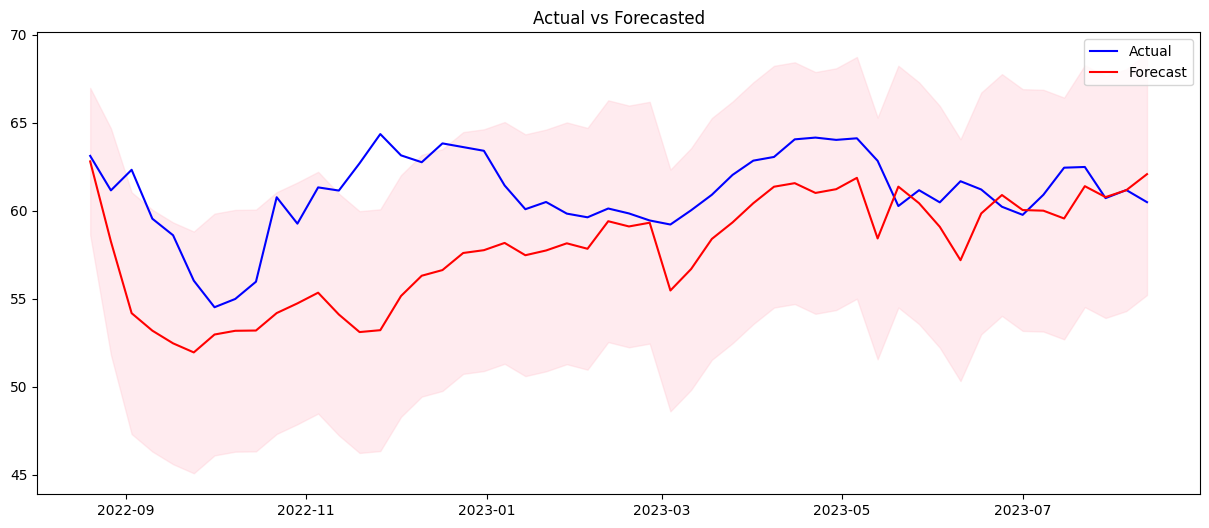

In [184]:
model = SARIMAX(train, order=(0,0,2), seasonal_order=(1,0,1,52))
model_fit = model.fit(disp=False)
predictions = model_fit.forecast(steps=len(test))

# 2. Generate predictions for the test set
forecast = model_fit.get_forecast(steps=len(test))
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# 3. Plot actual vs. predicted values along with confidence intervals
plt.figure(figsize=(15, 6))
# Actual values
plt.plot(test.index, test, label='Actual', color='blue')
# Predicted values
plt.plot(mean_forecast.index, mean_forecast, label='Forecast', color='red')
# Confidence intervals
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Actual vs Forecasted')
plt.legend()
plt.show()

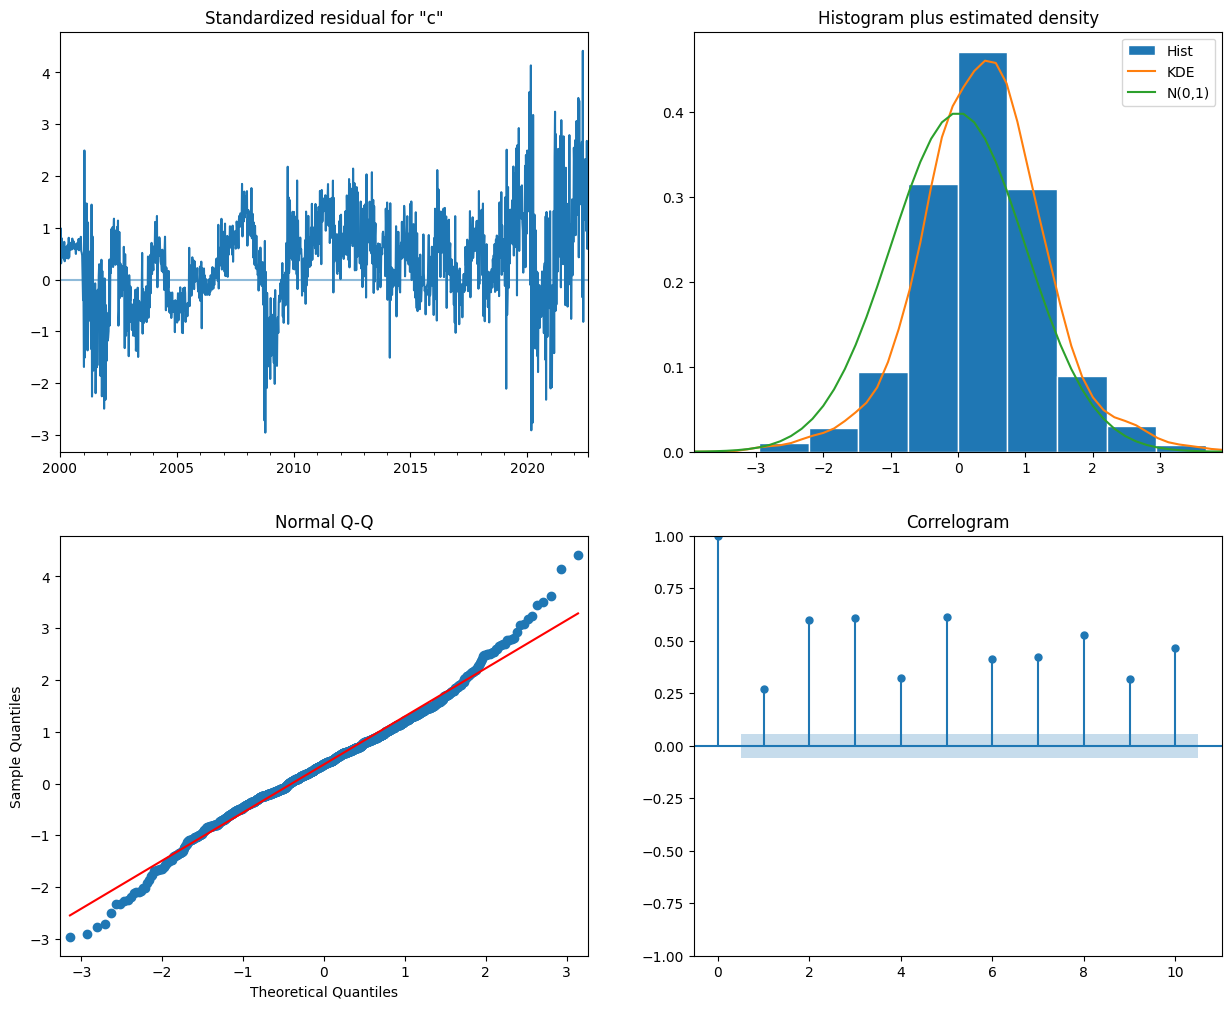

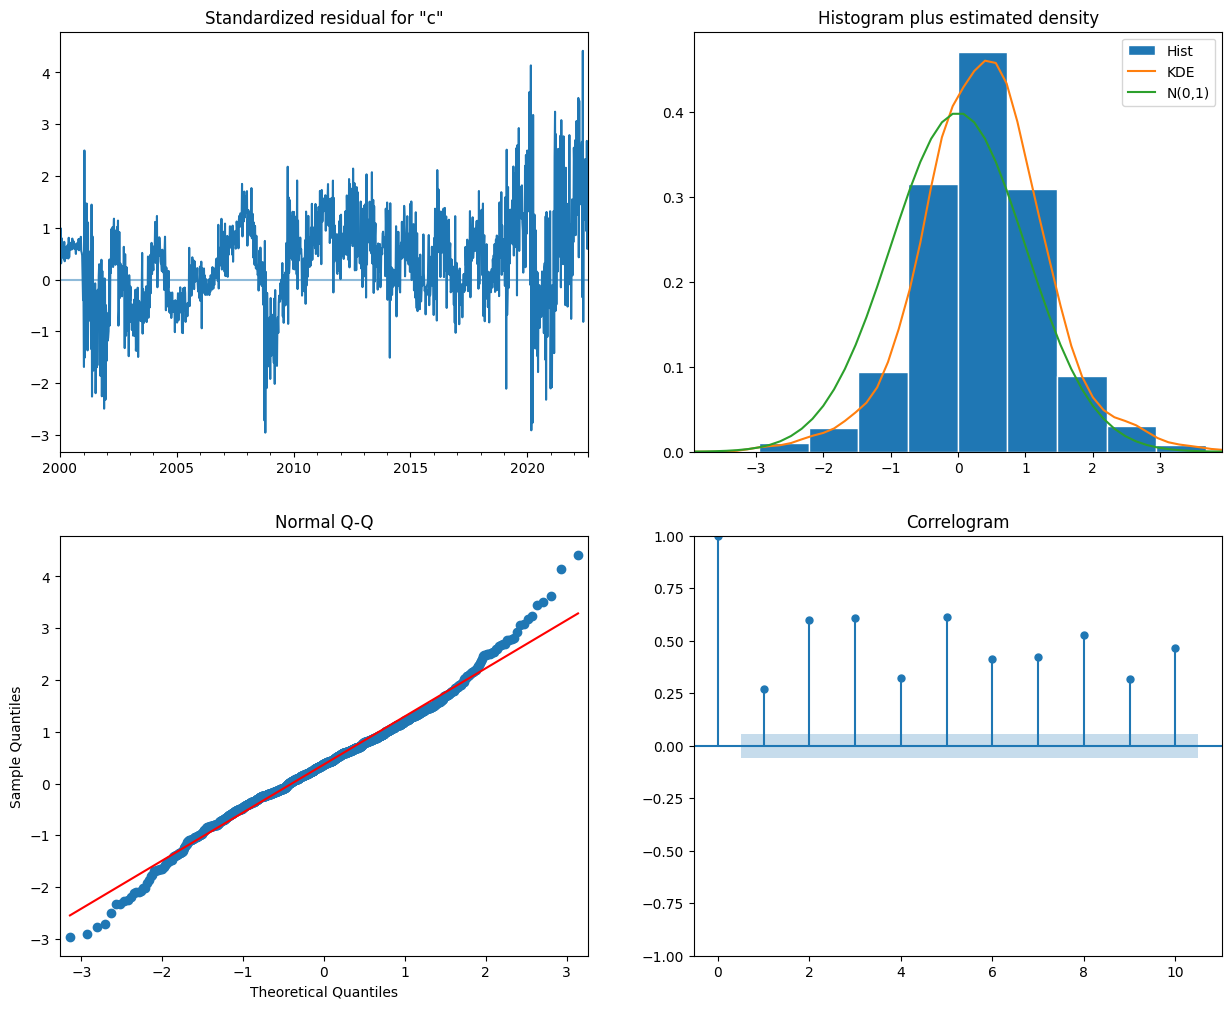

In [185]:
model_fit.plot_diagnostics(figsize=(15,12))

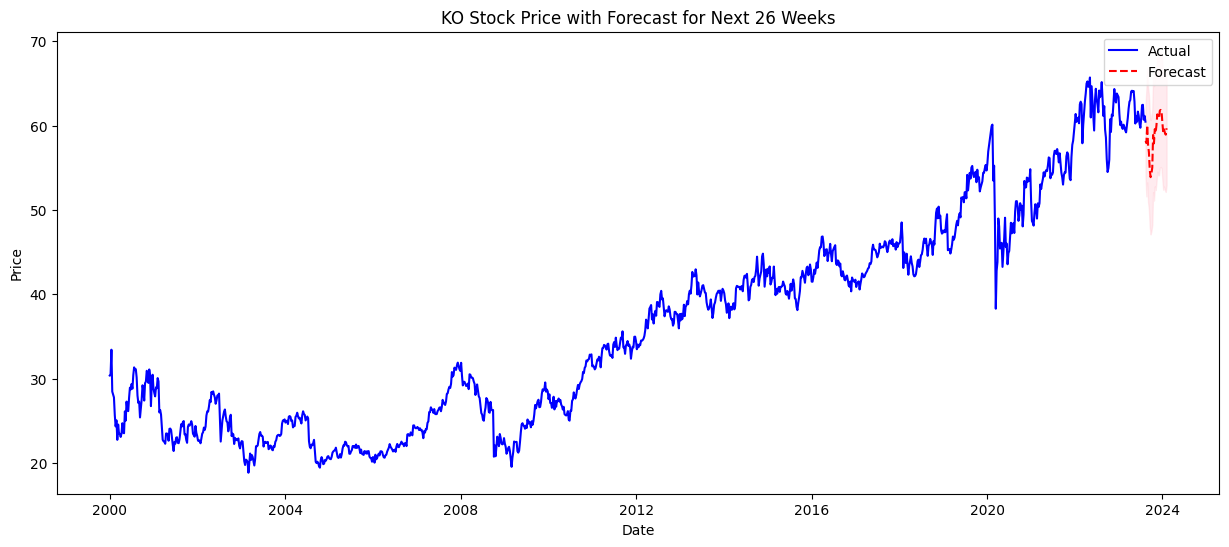

In [236]:
# Fit the model using the entire data
model = SARIMAX(series, order=(0,0,2), seasonal_order=(1,0,1,52))
model_fit = model.fit(disp=False)

# Forecast for the next 26 weeks
forecast_steps = 26
forecast = model_fit.get_forecast(steps=forecast_steps)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Generate the dates for the next 2 weeks, assuming your series has a DateTime index
forecast_dates = pd.date_range(series.index[-1], periods=forecast_steps, closed='right',freq='W')

plt.figure(figsize=(15, 6))

# Plot actual values
plt.plot(series.index, series, label='Actual', color='blue')

# Plot forecasted values for the next 2 weeks
plt.plot(forecast_dates, mean_forecast.values, label='Forecast', color='red', linestyle='--')

# Confidence intervals for the forecasted values
plt.fill_between(forecast_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

plt.title('KO Stock Price with Forecast for Next 26 Weeks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


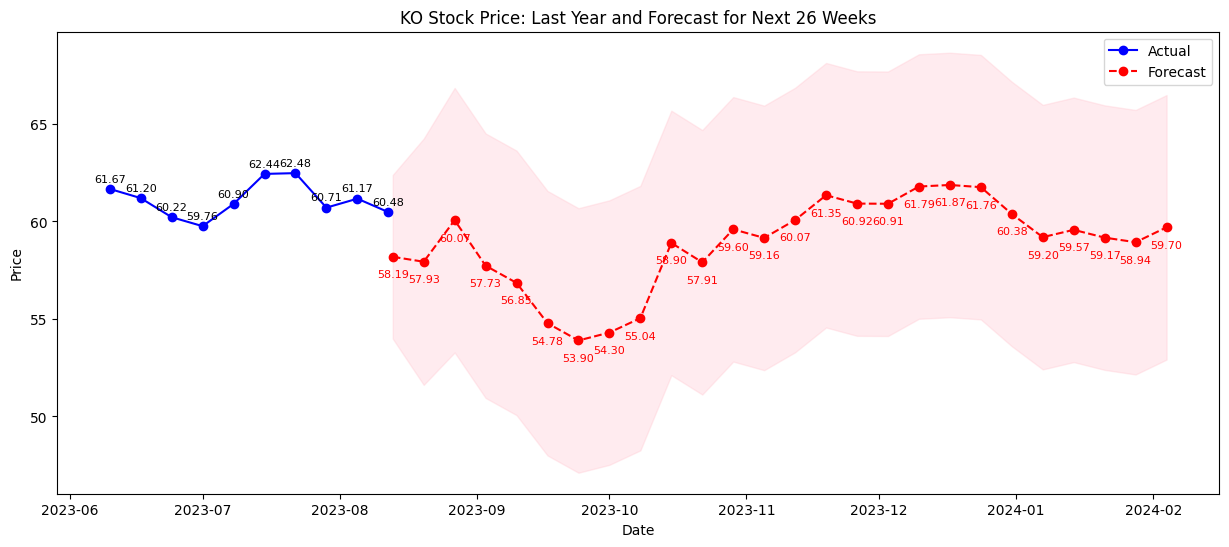

In [235]:
plt.figure(figsize=(15, 6))

# Plot the actual values for the last year
plt.plot(series.index[-window:], series[-window:], label='Actual', color='blue', marker='o')

# Plot the forecasted values
plt.plot(forecast_dates, mean_forecast.values, label='Forecast', color='red', linestyle='--', marker='o')

# Confidence intervals for the forecasted values
plt.fill_between(forecast_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

# Annotate actual values
for date, value in zip(series.index[-window:], series[-window:]):
    plt.annotate(f"{value:.2f}", (date, value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# Annotate forecasted values
for date, value in zip(forecast_dates, mean_forecast.values):
    plt.annotate(f"{value:.2f}", (date, value), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8, color='red')

plt.title('KO Stock Price: Last Year and Forecast for Next 26 Weeks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
